# Shelter Animals - Exploratory Data Analysis

The purpose of this notebook is to explore the data and get an idea of what it entails. We want to explore it to see if there's any initial bias hidden within the data and its distribution, but also find patterns that can help us in our predictions. We'll be looking at the Austin dataset that has been processed in the Data Preparation notebook.

# Overview
1. [Initial Look At The Data](#chapter1)
2. [Analysing And Visualising The Data](#chapter2) 
3. [Saving the Dataframe](#chapter3)

# Importing libraries
We will begin by importing all the libraries we're going to require and printing their versions.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import time
import datetime
import calendar

from datetime import timedelta
from dateutil import parser
from wordcloud import WordCloud

#Printing the versions of the libaries used.
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)


%matplotlib inline
# !pip install wordcloud

numpy version: 1.20.3
pandas version: 1.3.2
matplotlib version: 3.4.2
seaborn version: 0.11.2


In [2]:
pd.__version__

'1.3.2'

# Loading In The Data
We're going to load in the Austin Merged dataset, which was created in the Data Preparation Notebook.

In [3]:
austin_df = pd.read_csv('Datasets/Austin Processed.csv')

# 1. Initial Look At The Data <a class="anchor" id="chapter1"></a>
We'll begin by taking an initial look at our whole dataset. We'll visualise the different features and their relation to our target variable to discover how helpful they will be. We'll use graphs as it makes it easier to understand a large amount of data and get an idea of any biases.

In [4]:
df = austin_df
austin_df.head()

,Animal ID,Animal Type,Breed,Breed Bucket,Gender,Color,Found Location,Date of Birth,Intake Name,Outcome Name,...,black,white,orange,tortie,calico,blue,tan,brindle,Days in Shelter,Days Bucket
0,A786884,Dog,Beagle Mix,NaN,Male,Tricolor,2501 Magin Meadow Dr in Austin (TX),2017-01-03 00:00:00,*Brock,*Brock,...,0,0,0,0,0,0,0,0,4 days 22:52:00,1-7 days
1,A706918,Dog,English Springer Spaniel,NaN,Female,White/Liver,9409 Bluegrass Dr in Austin (TX),2007-07-05 00:00:00,Belle,Belle,...,0,1,0,0,0,0,0,0,0 days 02:14:00,0-1 days
2,A724273,Dog,Basenji Mix,NaN,Male,Sable/White,2818 Palomino Trail in Austin (TX),2015-04-17 00:00:00,Runster,Runster,...,0,1,0,0,0,0,0,0,6 days 22:34:00,1-7 days
3,A665644,Cat,Domestic Shorthair Mix,Domestic Shorthair,Female,Calico,Austin (TX),2013-09-21 00:00:00,NaN,NaN,...,0,0,0,0,1,0,0,0,0 days 03:40:00,0-1 days
4,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,NaN,Male,Tan/Gray,800 Grove Blvd in Austin (TX),2010-06-29 00:00:00,Rio,Rio,...,0,0,0,0,0,0,1,0,3 days 03:38:00,1-7 days


As we can see the dataframe contains a lot of columns. I've listed the full list of them below. Some information probably won't be necessary. In the preparation notebook we've bucketed categories and extracted a lot of information, which will come in useful later.

Most values are registered. The Breed bucket contains null values where no common breed could be found. This is included in (nearly) all animals from the non cat and dog categories.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132076 entries, 0 to 132075
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Animal ID           132076 non-null  object
 1   Animal Type         132076 non-null  object
 2   Breed               132076 non-null  object
 3   Breed Bucket        104109 non-null  object
 4   Gender              132076 non-null  object
 5   Color               132076 non-null  object
 6   Found Location      132076 non-null  object
 7   Date of Birth       132076 non-null  object
 8   Intake Name         91664 non-null   object
 9   Outcome Name        91664 non-null   object
 10  Intake DateTime     132076 non-null  object
 11  Outcome DateTime    132076 non-null  object
 12  Sex upon Intake     132076 non-null  object
 13  Sex upon Outcome    132076 non-null  object
 14  Age upon Intake     132076 non-null  object
 15  Age upon Outcome    132056 non-null  object
 16  In

### How Are Our Animal Types Distributed?
We're going to plot the different animal types. For this we'll use a countplot. It chooses the values in a column as groups and shows how much each value occurs. As you can see the categories Bird and Livestock are so small that we can't see them. While we could plot the graph logarithmically this would make it harder to see the distribution. 

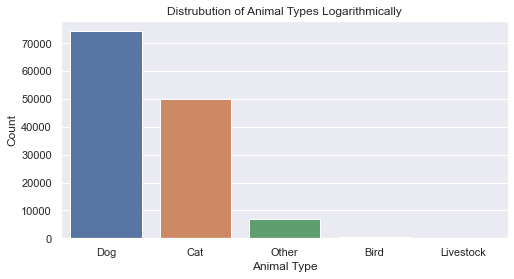

Dog          74270
Cat          50083
Other         7080
Bird           619
Livestock       24
Name: Animal Type, dtype: int64


In [6]:
sns.set(rc={'figure.figsize':(8,4)})
plot = sns.countplot(x='Animal Type', data=df)
ax = plot.axes
ax.set_ylabel('Count')

plt.title('Distrubution of Animal Types Logarithmically')
plt.show()

print(df['Animal Type'].value_counts())

Because we don't inherently know what the 'Other' category entails we're going to look into it further.

In [7]:
df[df['Animal Type'] == 'Other']['Breed'].value_counts()[:10]

Bat Mix           1755
Bat               1654
Raccoon Mix        539
Raccoon            474
Rabbit Sh Mix      337
Guinea Pig         276
Opossum Mix        191
Rabbit Sh          177
Guinea Pig Mix     152
Opossum            151
Name: Breed, dtype: int64

The 'Other' category mostly contains wildlife consisting of bats, raccoons, opossums, skunks and squirrels. There are also some rabbits and guinea pigs which might be kept as pets. Following our data requirements we want data that is specific to cats and dogs. We're choosing to focus on them because they're the most common pets, meaning they're most relevant in terms of an adoption prediction.

In [8]:
df = df[(df['Animal Type'] == 'Dog') | (df['Animal Type'] == 'Cat')]

### How Often Do Euthanasia Requests Get Denied?
Intake types contain a euthanasia request category. If the request is accepted the animals die shortly after entering the shelter which would skew with the data. Let's have a look how often euthanasia requests get accepted. 

In [9]:
print('Euthanasia Requests:', len(df[(df['Intake Type'] == 'Euthanasia Request')]))
print('Denied Requests:', len(df[(df['Intake Type'] == 'Euthanasia Request') & (df['Outcome Type'] != 'Euthanasia')]))

Euthanasia Requests: 241
Denied Requests: 55


A large majority of the time they are accepted, meaning we probably wish to filter these out.

### What Outcomes Are There? Are They All Relevant?
Based on our data requirements we're interested in predicting adoptions while our data also shows when animals have died, been transferred or have been returned to their owner. We'll have a look at how the different types are distributed and how they influence the adoption speed. It could for example be possible that hard to adopt animals are transferred. Simply removing these could lead to a bias.

<Figure size 576x576 with 0 Axes>

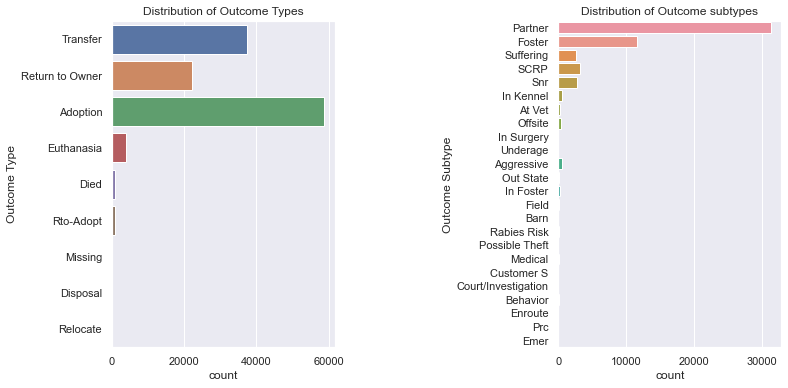

In [10]:
plt.figure(figsize=(8,8))
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,6))

ax1 = sns.countplot(y="Outcome Type", data=df, ax=axes[0])
ax2 = sns.countplot(y="Outcome Subtype", data=df, ax=axes[1])
ax1.set_title('Distribution of Outcome Types')
ax2.set_title('Distribution of Outcome subtypes')
plt.subplots_adjust(wspace=1)

Text(0.5, 1.0, 'Amount of Outcome Types Colored by Adoption Speed')

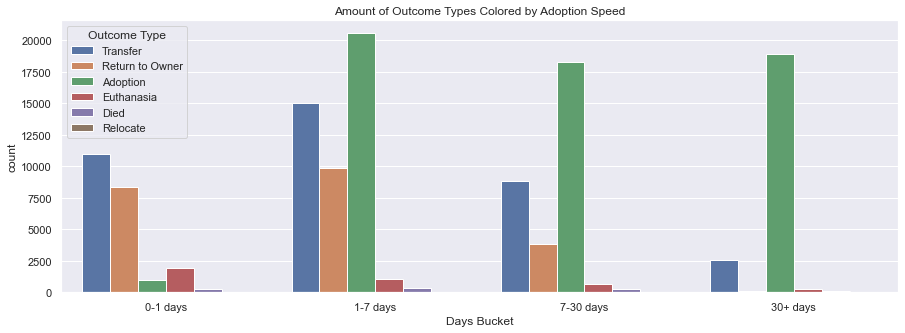

In [11]:
sns.set(rc={'figure.figsize':(15,5)})
outcome_types = df[(df['Outcome Type'] != 'Missing') & (df['Outcome Type'] != 'Rto-Adopt') & (df['Outcome Type'] != 'Disposal')]

ax = sns.countplot(x="Days Bucket", hue="Outcome Type", data=outcome_types, order = ['0-1 days', '1-7 days', '7-30 days', '30+ days'])
ax.set_title('Amount of Outcome Types Colored by Adoption Speed')

Surprisingly animals that are transferred usually stay for less than a week. Adoption is spread somewhat evenly across three categories with a very small percentage being adopted in the first day. It might be worth re-bucketing them to make a more even distribution. Dogs that are returned to their owner rarely stay for more than a week and never for longer than a month.

In [12]:
df = df[df['Outcome Type'] == 'Adoption']
df.drop('Outcome Type', axis=1 , inplace=True)

# 2. Analysing And Visualising The Data <a class="anchor" id="chapter2"></a>
Now that we've had an initial look at our data and made an important selection, we can have a further look at our data. We'll visualise the different distributions and see how our features influence our target variable.

### How is Adoption Speed Distributed?
Adoption Speed is our target variable. This can either be viewed as a number or a category. We already bucketed the adoption speeds in the Data Preparation notebook. 

We'll first have a look at the raw values. For this we'll convert the values to an integer that represents the number of full days. Afterwards we can get a value count of the full days to see how often each occurs. This value count data can then be plotted after putting it into a new dataframe.

Text(0.5, 1.0, 'Distribution of Adoption Speed')

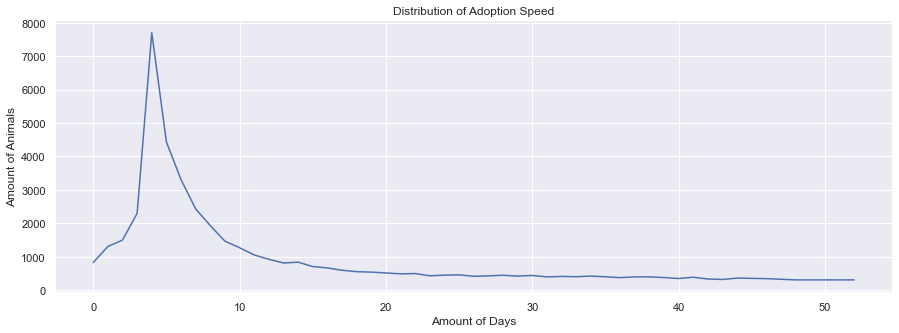

In [13]:
# Create dataframe with Days as integer
df_days = pd.to_timedelta(df['Days in Shelter'])
df_days = df_days.to_frame()
df_days['Days'] = df_days['Days in Shelter'].dt.days

# Get a series with value counts within a certain range
stay_dist = df_days['Days'].value_counts()
stay_dist = stay_dist[stay_dist > 300]

# Create a dataframe based on the found values
stay_dist_df = stay_dist.to_frame()
stay_dist_df.reset_index(inplace=True)
stay_dist_df.columns = ['Amount of Days', 'Amount of Animals']

# Line plot the dataframe
ax = sns.lineplot(data=stay_dist_df, x='Amount of Days', y="Amount of Animals")
ax.set_title('Distribution of Adoption Speed')

Interestingly enough there's a big spike at the start. Using a countplot we can easily identify that the spike is on the fourth day. Considering the data is from a no kill shelter this shouldn't be due to the animals being euthanised. Perhaps this is when owners often find their animals back, but this needs further research. 

Text(0.5, 1.0, 'Distribution of Adoption Speed as bar plot')

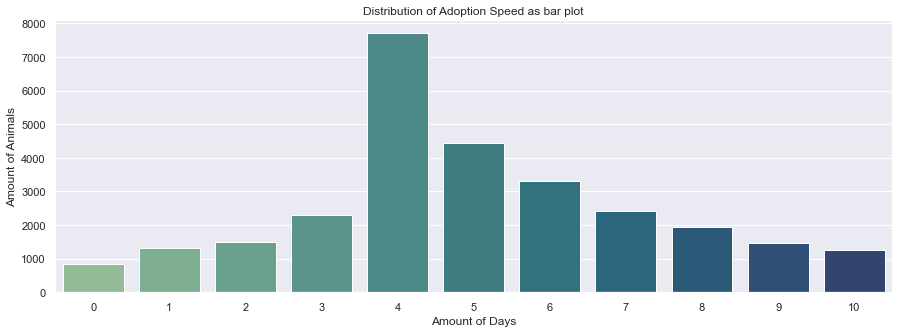

In [14]:
df_10_days = stay_dist_df[stay_dist_df['Amount of Days'] <= 10]
ax = sns.barplot(x="Amount of Days", y="Amount of Animals", data=df_10_days, palette = 'crest')
ax.set_title('Distribution of Adoption Speed as bar plot')

Of course, we can also have a look at the buckets, which is probably what we're going to end up using for our prediction. We need to make a new dataframe in order to sort the groups in an ascending order. After this we can use a simple barplot.  

As we can see the distribution is fairly even. Most animals are adopted in the 1-7 day period.

The biggest category makes up 34.96 percent


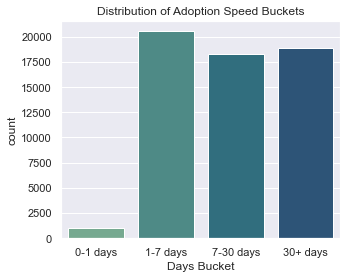

In [15]:
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.countplot(x="Days Bucket", data=df, palette = 'crest', order=['0-1 days', '1-7 days', '7-30 days', '30+ days'])
ax.set_title('Distribution of Adoption Speed Buckets')

day_counts = df['Days Bucket'].value_counts()
biggest_category = round(day_counts.max() / day_counts.sum() * 100, 2)
print('The biggest category makes up', biggest_category, 'percent')

### Is It Possible To Distribute Adoption Speed More Evenly?
While we could keep the data the way we originally bucketed it, I would prefer data that meets the Quantile Classification principles. It is useful for showing ranking or ordinal data. The downside is that it doesn't show the difference between each rank and can therefor be deceiving.  

We could write an algorithm to find the best distribution, but this would have the downside of potentially creating weird margins. We'll instead use the code that we used in the Data Preparation notebook and use trial and error to get a close result.

The biggest category makes up 23.5 percent


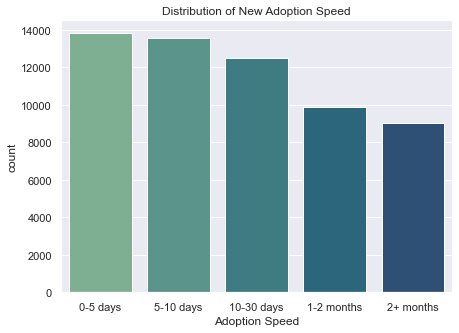

In [16]:
df['Days in Shelter'] = pd.to_timedelta(df['Days in Shelter'])

def get_days_bucket(days):
    try:
        if days <= timedelta(days = 5):
            return "0-5 days"
        elif days <= timedelta(days = 10):
            return "5-10 days"
        elif days <= timedelta(days = 30):
            return "10-30 days"
        elif days <= timedelta(days = 60):
            return "1-2 months"
        else:
            return "2+ months"
    except:
        return np.nan

df['Adoption Speed'] = df['Days in Shelter'].apply(get_days_bucket)

fig, ax = plt.subplots(figsize=(7,5))

bucket_order = ['0-5 days', '5-10 days', '10-30 days', '1-2 months', '2+ months']
ax = sns.countplot(x="Adoption Speed", data=df, palette = 'crest', order=bucket_order)
ax.set_title('Distribution of New Adoption Speed')

day_counts = df['Adoption Speed'].value_counts()
biggest_category = round(day_counts.max() / day_counts.sum() * 100, 2)
print('The biggest category makes up', biggest_category, 'percent')

df.drop('Days Bucket', axis=1, inplace=True)

### Are Cats or Dogs Adopted Faster? And What Is The Overall Distribution?
We have significantly more dogs than cats. Putting aside the increased numbers, dogs are overall still adopted a lot faster than cats are. The number of dogs actually declines the longer it takes, whereas it increases for cats. This means the animal type will most likely make for a good feature.

Dogs: 35459
Cats: 23320


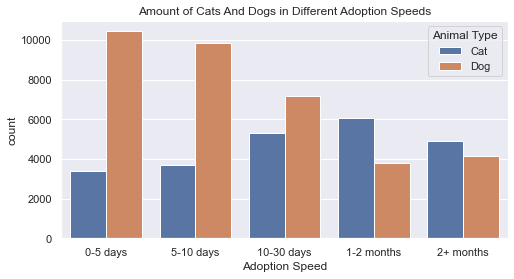

In [17]:
sns.set(rc={'figure.figsize':(8,4)})

ax = sns.countplot(x="Adoption Speed", hue="Animal Type", data=df, order=bucket_order)
ax.set_title('Amount of Cats And Dogs in Different Adoption Speeds')

print('Dogs:', len(df[df['Animal Type'] == 'Dog']))
print('Cats:', len(df[df['Animal Type'] == 'Cat']))

### What Breeds Do We Have? Which are most common? Can we visualise them?
There's a lot of different breeds, which makes it very hard to plot them all against one another. For this reason we've bucketed the breeds in the Data Preparation notebook. For visualisation purposes it might be interesting to separate them based on whether they're cats or dogs. 

In [18]:
print('Unique breeds:', len(df['Breed'].unique()))
print('Unique bucketed breeds:', len(df['Breed Bucket'].unique()))

Unique breeds: 1843
Unique bucketed breeds: 15


One way to visualise such a large number of categories is to use a wordcloud. The larger the words are the more the value occurs in the dataset. For example, we can see we have a lot of Domestic Short hair and Shorthair Mix which are both cats. There's also a lot of Labrador Retrievers and Bull Mixes. In the Data Preparation notebook we grouped some of these breeds together.

(-0.5, 1199.5, 999.5, -0.5)

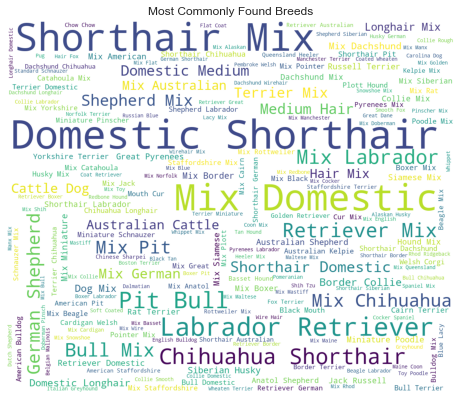

In [19]:
fig, ax = plt.subplots(figsize=(8,8))

text_breeds = ' '.join(df['Breed'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text_breeds)
plt.imshow(wordcloud)
plt.title('Most Commonly Found Breeds')
plt.axis("off")

Text(0.5, 1.0, 'Distribution Of Breeds')

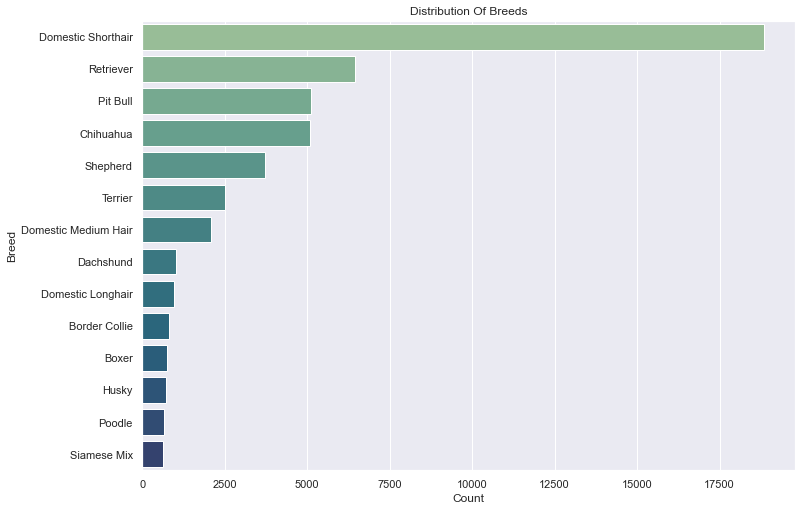

In [20]:
common_breeds = df['Breed Bucket'].value_counts()
common_breeds_df = pd.DataFrame({'Breed': common_breeds.index, 'Count': common_breeds.values})

common_breeds_df
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="Count", y="Breed", data=common_breeds_df, palette="crest")
ax.set_title('Distribution Of Breeds')

Interesting to note is that almost all cats are domestic shorthairs, whereas the dog races are distributed a bit more evenly. Retrievers. Chihuahuas and Pit bulls take the lead by far, while there's a good amount of Shepherds and Terriers. The other dog races are very uncommon and might lack data. It's also important to keep in mind not all animals in our dataset have a bucketed breed.

### How Do The Breeds Affect Adoption Speed?
Some breeds might get adopted more easily than others. For this sake dogs are more interesting than cats due to their variety of breeds. We'll plot the amount of animals per breed sorted by adoption speed. We overall find a decline. Pit bulls seem to be adopted slower. Shepherds also have a small spike at the 5-10 day category, but because it's only a small difference this could simply be a coincidence. 

Text(0.5, 1.0, 'Different Dog Breeds in Different Adoption Speeds')

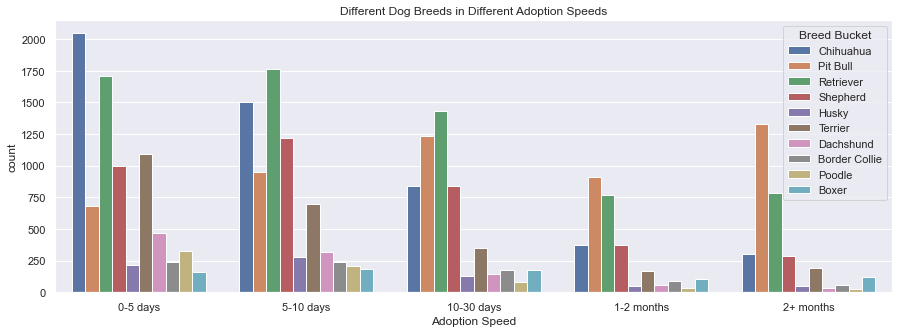

In [21]:
sns.set(rc={'figure.figsize':(15,5)})
df_dogs = df[df['Animal Type'] == 'Dog']

ax = sns.countplot(x="Adoption Speed", hue="Breed Bucket", data=df_dogs, order=bucket_order)
ax.set_title('Different Dog Breeds in Different Adoption Speeds')

We can do the same thing for cats. When we do, we mainly find a trend in the domestic shorthair and medium hair, which matches the overall trend of cats. The domestic longhair mostly matches the trend as well, but due to the small sample size it isn't as clear. The Siamese seems to bounce around a lot, but this again could be a coincidence due to small sample size. Either way, the breed of cats seems less relevant for adoption speed than the breed of dogs.

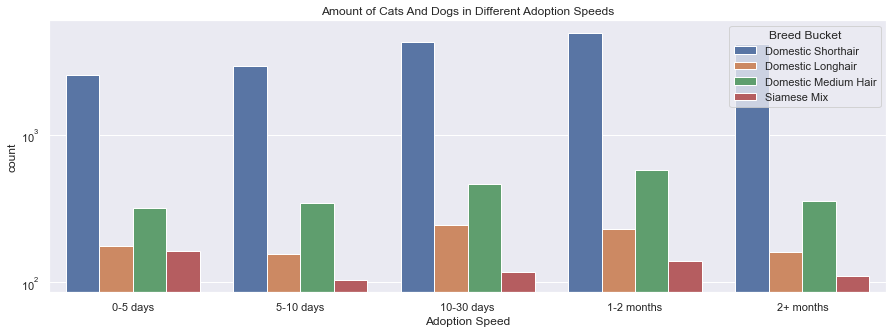

In [22]:
sns.set(rc={'figure.figsize':(15,5)})
df_cats = df[df['Animal Type'] == 'Cat']

ax = sns.countplot(x="Adoption Speed", hue="Breed Bucket", data=df_cats, order=bucket_order)
ax.set_title('Amount of Cats And Dogs in Different Adoption Speeds')
ax.set_yscale('log')

### What Is The Distribution Of Genders? Does It Differ For Cats And Dogs? 
There's a couple of animals whose gender is unknown. Guessing the gender is close to a 50/50 chance. Because the number is so small compared to the full dataset we're going to discard these animals.

The amount of male and female cats and dogs is nearly equal. Dogs have a few more males whereas cats have a few more females. The difference isn't very significant and could very well be due to chance. 

In [23]:
print('Unknown Genders:', str(len(df[df['Gender'] == 'Unknown'])))
df = df[df['Gender'] != 'Unknown']

Unknown Genders: 4


<Figure size 576x576 with 0 Axes>

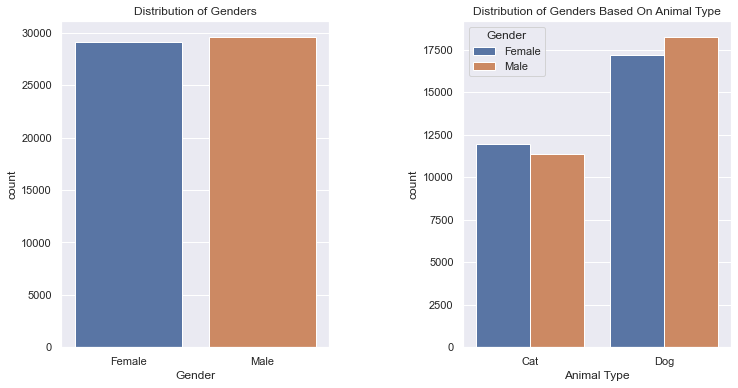

In [24]:
plt.figure(figsize=(8,8))
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,6))

ax1 = sns.countplot(x="Gender", data=df, ax=axes[0])
ax2 = sns.countplot(x="Animal Type", data=df, hue='Gender', ax=axes[1])
ax1.set_title('Distribution of Genders')
ax2.set_title('Distribution of Genders Based On Animal Type')
plt.subplots_adjust(wspace=0.5)

### How Does Gender Affect Adoption Speed?
There does not seem to be a strong correlation between gender and adoption speed. We see that amounts differ slightly which is more than likely due to chance as opposed to an actual correlation.

Text(0.5, 1.0, 'Effect of Gender On Adoption Speed')

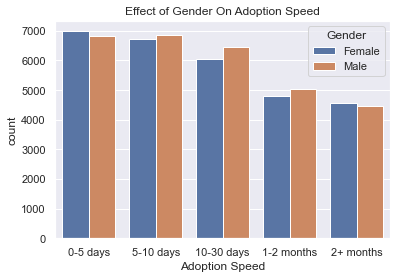

In [25]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x="Adoption Speed", hue="Gender", data=df, order=bucket_order)
ax.set_title('Effect of Gender On Adoption Speed')

### How Many Different Colours Are Found In The Dataset? Can we visualize them?
Interestingly enough the number of colours is smaller than the number of breeds, but still too big to plot them all. We can analyse the top 10 the same way we did before. Another option is to show all of them in another worldcloud. The main use of this is to see which colours are most common and whether or not we missed any common colours when extracting them during the Data Preparation stage.

In [26]:
len(df['Color'].unique())

434

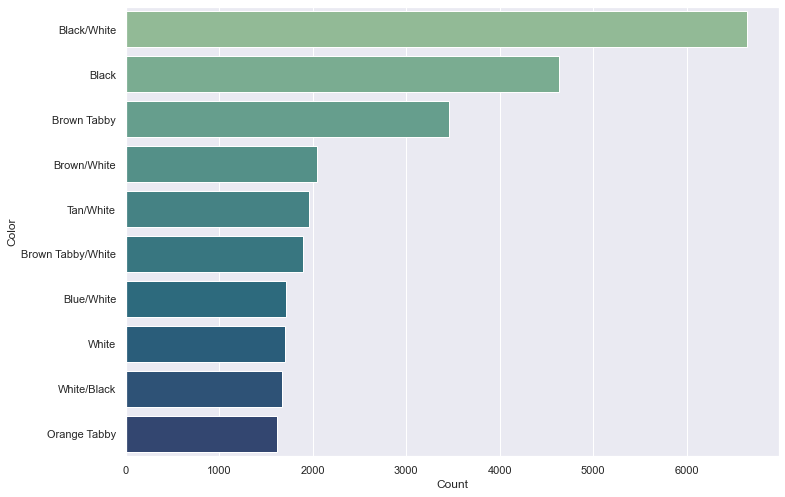

In [27]:
common_color = df['Color'].value_counts()[:10]
common_color_df = pd.DataFrame({'Color': common_color.index, 'Count': common_color.values})

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="Count", y="Color", data=common_color_df, palette="crest")

(-0.5, 1199.5, 999.5, -0.5)

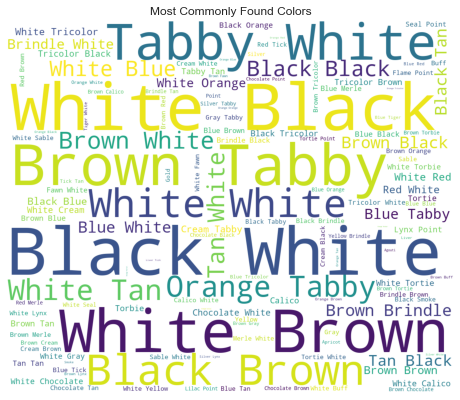

In [28]:
fig, ax = plt.subplots(figsize=(8,8))

text_colors = ' '.join(df['Color'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text_colors)
plt.imshow(wordcloud)
plt.title('Most Commonly Found Colors')
plt.axis("off")

Black is a very common colour, which makes sense as Domain Understanding told us a black coat is a dominant trait. As we can see it shows up a large number of times in many different categories. White, Brown and Tabby also occur a lot.

### How Many Animals Are There Per Bucketed Column? Is There A Correlation With Adoption Speed?
In the Data Preparation notebook we've picked out the most common colours and sorted animals into these categories. When a colour category has a 1 this indicates that the colour was present, either by itself or grouped with other colours. This means an animal can have a 1 in multiple columns. 

In order to view the distribution of colours we need to create a new dataframe. We get the value count of 1s of each of the colour features and save these accordingly.

In [29]:
df = df.rename(columns={'tabby': 'Tabby', 'tricolor': 'Tricolor', 'brown': 'Brown', 'black': 'Black', 
                  'white': 'White', 'orange': 'Orange', 'tortie': 'Tortie', 'calico': 'Calico',
                  'blue': 'Blue', 'tan': 'Tan', 'brindle': 'Brindle'})

Text(0.5, 1.0, 'Amount Of Animals That Contain Various Colors')

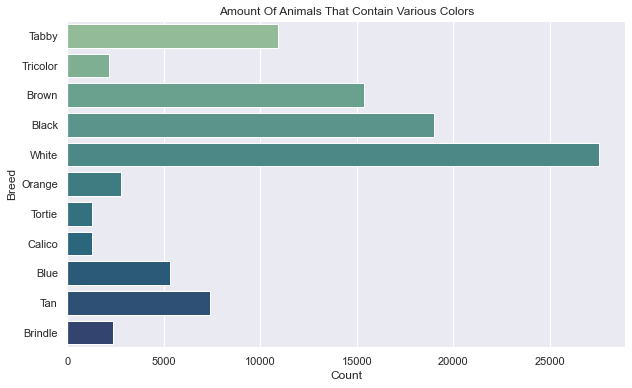

In [30]:
colors = ['Tabby', 'Tricolor', 'Brown', 'Black', 'White', 'Orange', 'Tortie', 'Calico', 'Blue', 'Tan', 'Brindle']
color_df = df[colors]

color_bucket_count = {}
for column in color_df.columns:
    color_bucket_count[column] = color_df[column].value_counts()[1]

color_bucket_df  = pd.DataFrame.from_dict(color_bucket_count, orient='index').reset_index()
color_bucket_df.columns = ['Breed', 'Count']
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.barplot(x='Count', y="Breed", data=color_bucket_df, palette="crest")
ax.set_title('Amount Of Animals That Contain Various Colors')

Surprisingly there's a very large number of white animals. This could either due to the fact that there's a lot of white animals, because a lot of white animals end up in shelters or because a lot of animals contain both a white and other colours.

We can also have a look at this data grouped by Adoption Speed. We'll again create a new DataFrame. Rather than just filtering on the amount of 1s we'll also add the adoption speed as a criterion. Because the amount of animals per colour varies we're going to take the percentage as opposed to the total count. 

The graph shows us Tricolored and Tan animals are likely to be adopted quite fast. Brown, Black and White animals are adopted at equal speed. Torties take quite long to get adopted in comparison with the others.

Text(0.5, 1.0, 'Division Of Adoption Speed Among Different Colored Animals')

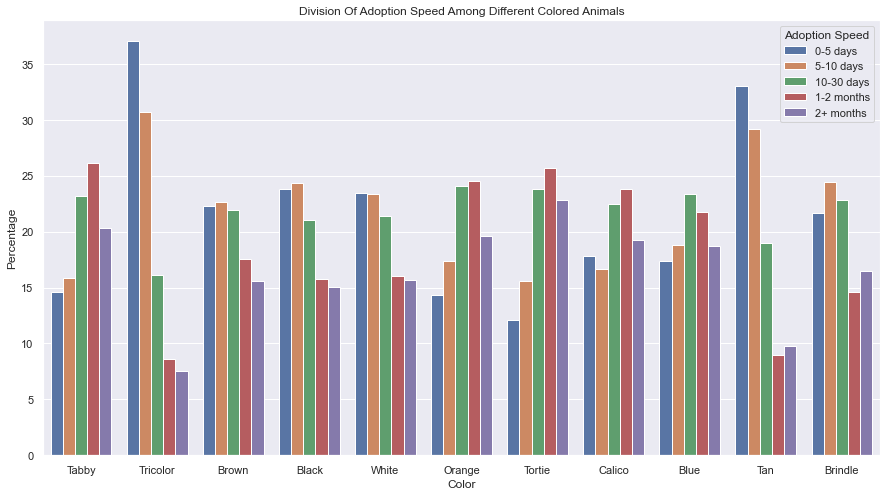

In [31]:
color_bucket_speed = []

# Check all colors in our earlier color list then in each loop over each adoption speed
for color in colors:
    for bucket in df['Adoption Speed'].unique():
        color_condition = (df[color] == 1)
        bucket_condition = (df['Adoption Speed'] == bucket)
        
        # Find counts per color or bucket definition and do the math to get the percentage
        bucket_count = df[color_condition & bucket_condition][color].count()
        percentage = bucket_count / df[color_condition][color].count() * 100
        
        color_bucket_speed.append([color, bucket, percentage])

# Create Dataframe out of the list we created
color_speed_df = pd.DataFrame.from_records(color_bucket_speed, columns = ['Color', 'Adoption Speed', 'Percentage'])

# Graph Data
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x='Color', y="Percentage", hue='Adoption Speed', data=color_speed_df, hue_order=bucket_order)
ax.set_title('Division Of Adoption Speed Among Different Colored Animals')

### How Is The Date Of Birth Distributed? And How Does It Affect Adoption Speed?
We have to convert our Date of Birth to datetime format in order to resample it into years. This allows us to quickly get a count of each date of birth. After converting the value to just the year we can plot the values. We expect most of the data to be centred over the last decade because a lot of younger animals end up in shelters.


Text(0.5, 1.0, 'Distribution of Date of Birth')

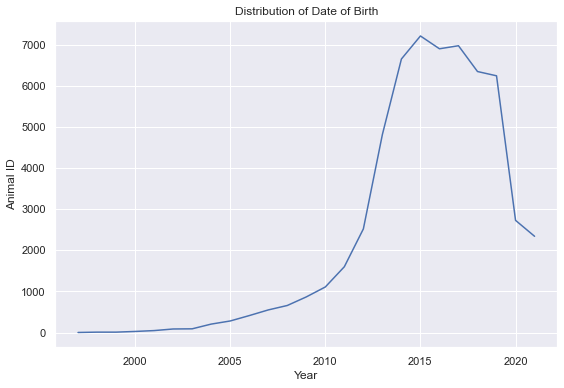

In [32]:
df['Date of Birth'] = df.apply(lambda x: parser.parse(x['Date of Birth'])
                                               .isoformat(),axis=1).astype('datetime64')
dates = df.set_index('Date of Birth')
dates = dates.resample("Y").count()
dates = dates.reset_index()
dates['Year'] = pd.DatetimeIndex(dates['Date of Birth']).year

sns.set(rc={'figure.figsize':(9,6)})
ax = sns.lineplot(data=dates, x='Year', y="Animal ID")
plt.title('Distribution of Date of Birth')

As expected, the majority of birthdates is between 2013 and 2018 with the maximum being around 2015. There do not appear to be a lot of data of recent young animals. This will be clearer once we have a look at the Age feature.

We can also group the date of birth by adoption speed. The result is very much the same, spiking around the same date of birth.

Text(0.5, 1.0, 'Effect of Date of Birth on Adoption Speed')

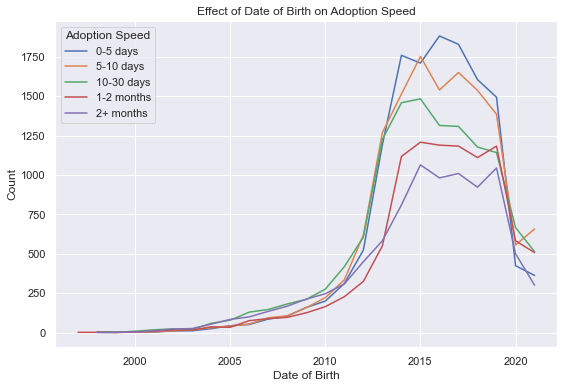

In [33]:
dob_df = df[['Adoption Speed', 'Date of Birth']]
dob_df = dob_df.set_index('Date of Birth').groupby('Adoption Speed').resample("Y").count()
dob_df = dob_df.rename(columns={'Adoption Speed': 'Count'})
dob_df = dob_df.reset_index()
dob_df['Date of Birth'] = dob_df['Date of Birth'].dt.year

sns.set(rc={'figure.figsize':(9,6)})
sns.lineplot(data=dob_df, x='Date of Birth', y='Count', hue='Adoption Speed', hue_order = bucket_order)
plt.title('Effect of Date of Birth on Adoption Speed')

Animals born in this spike of 2013 to 2018 actually seem to get adopted faster.

### How Many Names Are There? How Often Do They Change?
I expect the variety of names to be very large and therefor a bad indicator of anything. Technically speaking the name could have some meaning due to human psychology. People might name certain types of animals, e.g. friendly animals, differently from shy or aggressive ones.

In [34]:
print('Intake Names:', len(df['Intake Name'].unique()))
print('Outcome Names:', len(df['Outcome Name'].unique()))

Intake Names: 14404
Outcome Names: 14404


Interesting enough the number out intake names it the exact same as the number out outcome names. This means we can go ahead and drop one of the columns and rename the other to Name.

In [35]:
print('Non overlapping names:', 
      len(df.loc[(df['Intake Name'] != df['Outcome Name']) & (~df['Intake Name'].isna() & ~df['Outcome Name'].isna())])) 
df.drop('Outcome Name', axis=1, inplace=True)
df.rename(columns={'Intake Name': 'Name'}, inplace=True)

Non overlapping names: 0


### What Are The Most Common Names For Cats And Dogs? 

(-0.5, 1199.5, 999.5, -0.5)

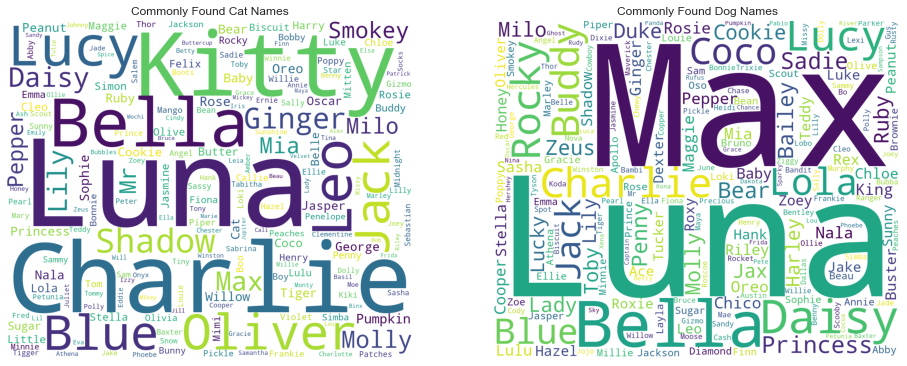

In [36]:
fig, ax = plt.subplots(figsize = (16, 12))

df_names = df[df['Name'] != 'Unknown']

plt.subplot(1,2,1)
text_cat_names = ' '.join((df_names[df['Animal Type'] == 'Cat']['Name']).fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text_cat_names)
plt.imshow(wordcloud)
plt.title('Commonly Found Cat Names')
plt.axis("off")

plt.subplot(1,2,2)
text_dog_names = ' '.join((df_names[df['Animal Type'] == 'Dog']['Name']).fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text_dog_names)
plt.imshow(wordcloud)
plt.title('Commonly Found Dog Names')
plt.axis("off")

Names differ quite strongly between cats and dogs. Common names for cats are Charlie, Bella and Luna. Lucy, Blue, Oliver, Leo and Jack are also quite common. The name "Kitty" occurs a decent amount. This could mean the name is simply unknown. 

For dogs Max, Bella and Luna are the most common followed by Daisy, Lucy and Rocky. We can get a clearer overview by simply looking at the numbers. here we also see some strange characters in the names.

In [37]:
df_names.groupby(['Animal Type', 'Name']).count().sort_values(
    by=['Animal Type', 'Animal ID'], ascending=False).groupby('Animal Type')['Animal ID'].head(10)

Animal Type  Name    
Dog          Max         224
             Luna        218
             Bella       198
             Daisy       174
             Lucy        145
             Rocky       134
             Buddy       126
             Charlie     113
             Coco        113
             Lola        111
Cat          Luna         91
             Bella        61
             Charlie      52
             *Charlie     49
             Kitty        44
             Leo          43
             Oliver       42
             Shadow       42
             Smokey       40
             Milo         39
Name: Animal ID, dtype: int64

In [38]:
df['Name'].fillna('Unknown', inplace=True)
df['Name'] = df['Name'].str.replace('*', '', regex=True)
df[df['Name'].str.match('[^A-Za-z\s]+')]

,Animal ID,Animal Type,Breed,Breed Bucket,Gender,Color,Found Location,Date of Birth,Name,Intake DateTime,...,Black,White,Orange,Tortie,Calico,Blue,Tan,Brindle,Days in Shelter,Adoption Speed
5308,A730198,Cat,Domestic Shorthair Mix,Domestic Shorthair,Female,Brown Tabby,8902 Briardale Dr in Austin (TX),2016-04-04,$Kittlez,2016-06-30 11:15:00,...,0,0,0,0,0,0,0,0,4 days 05:33:00,0-5 days
21571,A790292,Dog,German Shepherd Mix,Shepherd,Female,Black/Tan,Austin (TX),2017-03-07,7Muneca,2019-03-07 16:24:00,...,1,0,0,0,0,0,1,0,9 days 23:46:00,5-10 days
42645,A726406,Cat,Domestic Shorthair Mix,Domestic Shorthair,Female,Torbie,1106 Crown Oaks Dr in Austin (TX),2016-04-10,Éclair,2016-05-10 14:35:00,...,0,0,0,0,0,0,0,0,54 days 23:03:00,1-2 months
56584,A782572,Cat,Domestic Shorthair Mix,Domestic Shorthair,Female,Torbie,Austin (TX),2018-09-17,#2,2018-10-17 08:17:00,...,0,0,0,0,0,0,0,0,225 days 22:13:00,2+ months
71575,A835103,Cat,Domestic Shorthair,Domestic Shorthair,Female,Blue,2201 Montopolis Drive in Austin (TX),2021-04-17,835103,2021-05-23 13:14:00,...,0,0,0,0,0,1,0,0,30 days 23:11:00,1-2 months
86650,A700994,Cat,Domestic Shorthair Mix,Domestic Shorthair,Male,Black Tabby/White,3039 Tx-71 in Del Valle (TX),2015-04-07,3Ds,2015-04-22 12:18:00,...,1,1,0,0,0,0,0,0,93 days 06:30:00,2+ months
99610,A680305,Dog,Australian Kelpie Mix,NaN,Male,Sable,Austin (TX),2014-06-01,'Stache,2014-05-29 10:00:00,...,0,0,0,0,0,0,0,0,76 days 00:42:00,2+ months
100850,A798964,Cat,Domestic Shorthair,Domestic Shorthair,Male,Orange Tabby,14001 Dewberry Drive in Pflugerville (TX),2019-05-02,1,2019-07-02 14:38:00,...,0,0,1,0,0,0,0,0,5 days 05:05:00,5-10 days
120154,A798966,Cat,Domestic Shorthair,Domestic Shorthair,Male,Black,14001 Dewberry Drive in Pflugerville (TX),2019-05-02,2,2019-07-02 14:38:00,...,1,0,0,0,0,0,0,0,5 days 05:05:00,5-10 days
121322,A794823,Cat,Domestic Shorthair,Domestic Shorthair,Female,Brown Tabby,7200 Bar K Ranch Rd in Travis (TX),2019-04-18,Éclair,2019-05-12 15:27:00,...,0,0,0,0,0,0,0,0,106 days 00:37:00,2+ months


While there's still some strange names this seems to be limited. Some contain numbers or the animal ID. These names can be considered unknown. For the time being we'll leave them as they are, but we could replace or delete them in a future iteration.

### Do Animals With Name Have A Higer Adoption Speed?

It seems more likely to me that animals with a name have a higher chance of being adopted. Assuming an animal is listed with a name one might have an easier time identifying with the animal. Let's see if this is actually the case.

Text(0.5, 1.0, 'Adoption Speed Based On Whether Animal Name was Known')

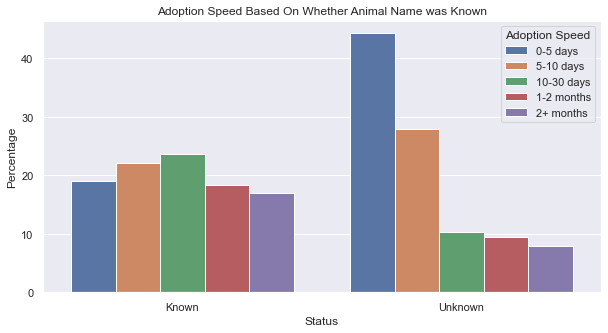

In [39]:
name_bucket_speed = []

# Create new dataframe that contains different adoption speed counts divided by having a name or not
for bucket in df['Adoption Speed'].unique():
    bucket_condition = (df['Adoption Speed'] == bucket)
    
    name_condition = (df['Name'] != 'Unknown')
    bucket_count = df[name_condition & bucket_condition]['Name'].count()
    percentage = bucket_count / df[name_condition]['Name'].count() * 100
    name_bucket_speed.append(['Known', bucket, percentage])
    
    name_condition = (df['Name'] == 'Unknown')
    bucket_count = df[name_condition & bucket_condition]['Name'].count()
    percentage = bucket_count / df[name_condition]['Name'].count() * 100
    name_bucket_speed.append(['Unknown', bucket, percentage])
    
# Create Dataframe out of the list we created by looping over data
name_speed_df = pd.DataFrame.from_records(name_bucket_speed, columns = ['Status', 'Adoption Speed', 'Percentage'])

fig, ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x='Status', y="Percentage", hue='Adoption Speed', data=name_speed_df, hue_order=bucket_order)
ax.set_title('Adoption Speed Based On Whether Animal Name was Known')

Surprisingly enough the opposite of my hypothesis seems to be true. Animals with known names are somewhat distributed over all adoption speeds, whereas Unknown animals very often don't have a name. This could be due to the fact that they were actually returned to an owner, because an adoption was already lined up or because the name wasn't listed for privacy reasons.

### How Is Castration Intake And Outcome Distributed? How Do They Affect Adoption Speeds?
Logically we expect to see a lot more castrated animals on outcome in comparison to intake, because a lot of owners prefer to have their pets neutered. Some pets also require neutering to overcome bad behaviour. It's a very common practise in a lot of shelters, especially if there's a chance of releasing the animal back into the wild.

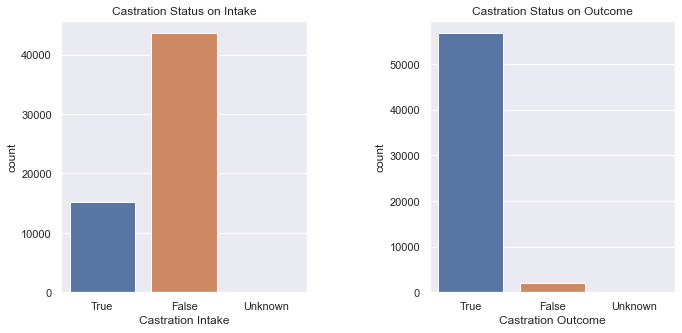

In [40]:
df['Castration Intake'].replace({'Neutered': True, 'Spayed': True, 'Intact': False}, inplace=True)
df['Castration Outcome'].replace({'Neutered': True, 'Spayed': True, 'Intact': False}, inplace=True)


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(11,5))
cast_order = [True, False, 'Unknown']
ax1 = sns.countplot(x="Castration Intake", data=df, order=cast_order, ax=axes[0])
ax2 = sns.countplot(x="Castration Outcome", data=df, order=cast_order, ax=axes[1])
ax1.set_title('Castration Status on Intake')
ax2.set_title('Castration Status on Outcome')

plt.subplots_adjust(wspace=0.5)

As expected, the large majority of animals is castrated on adoption. A very small portion is unknown in both situations. Approximately a quarter was castrated on intake while three quarter was not. This could be an indication that these animals have been pets before and/or behave better, which would make them more easily adoptable.

We can also have a look at the adoption speeds of the castration status on intake and outcome. The graph doesn't show anything too unexpected though; it largely matches the main distribution of adoption speeds, which declines over time. Animals are usually castrated quite quickly, which means this feature probably doesn't yield much weight.

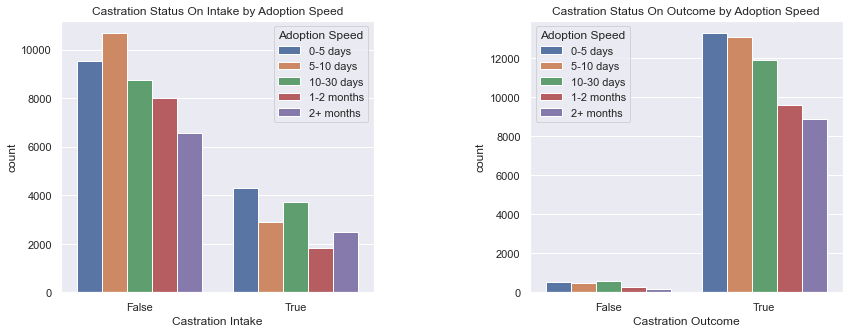

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,5))

df_castration_intakes = df[df['Castration Intake'] != 'Unknown']

ax1 = sns.countplot(x="Castration Intake", hue="Adoption Speed", data=df_castration_intakes, ax=axes[0], hue_order=bucket_order)
ax1.set_title('Castration Status On Intake by Adoption Speed')
ax2 = sns.countplot(x="Castration Outcome", hue="Adoption Speed", data=df_castration_intakes, ax=axes[1], hue_order=bucket_order)
ax2.set_title('Castration Status On Outcome by Adoption Speed')

plt.subplots_adjust(wspace=0.5)

In [42]:
df['Intake Type'].value_counts()

Stray                 40774
Owner Surrender       16640
Public Assist          1056
Abandoned               291
Euthanasia Request       14
Name: Intake Type, dtype: int64

In [43]:
df['Intake Condition'].value_counts()

Normal      54236
Injured      2012
Nursing      1168
Sick         1031
Aged           98
Other          83
Medical        51
Feral          33
Pregnant       31
Behavior       17
Neonatal       15
Name: Intake Condition, dtype: int64

### How Are Intake Type And Condition Distributed? Is There A Correlation With Adoption Speed?

There's a number of different intake types and conditions. I imagine owner surrenders are likely go get adopted harder due to problems with the animals. It could also be possible that I'm wrong and these animals get adopted easier because they're more acclimated to people. On the flipside non-normal intake conditions probably also take longer to get adopted.

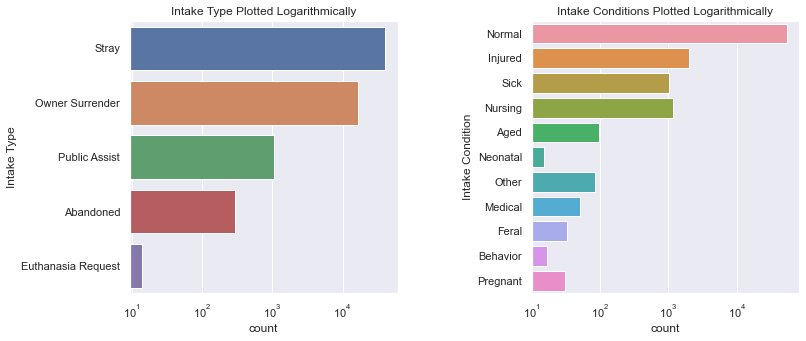

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))

ax1 = sns.countplot(y="Intake Type", data=df, ax=axes[0])
ax1.set_xscale("log")
ax1.set_title("Intake Type Plotted Logarithmically")

ax2 = sns.countplot(y="Intake Condition", data=df, ax=axes[1])
ax2.set_xscale("log")
ax2.set_title("Intake Conditions Plotted Logarithmically")

plt.subplots_adjust(wspace=0.5)

Important to note is that both count plots are logarithmically. There's a much larger number of strays than owner surrenders of public assists and the number of normal intake conditions exceeds the others by far.

Text(0.5, 1.0, 'Intake Condition Plotted Logarithmically')

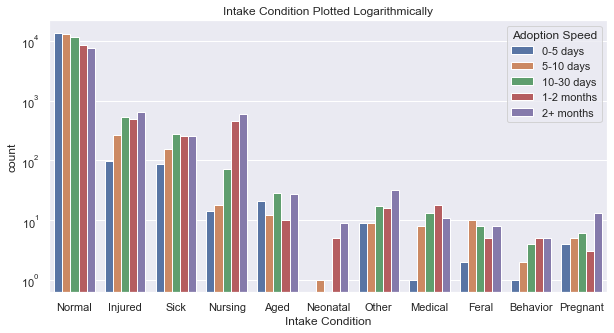

In [45]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(x='Intake Condition', hue='Adoption Speed', data=df, hue_order=bucket_order)
ax.set_yscale('log')
ax.set_title('Intake Condition Plotted Logarithmically')

Counts of normal intake conditions decline as adoption speed gets higher, whereas nursing, sick and injured have a clear opposite correlation. There's very little data of the other categories, so it's hard to draw a conclusion on them.

Text(0.5, 1.0, 'Intake Type Plotted Logarithmically')

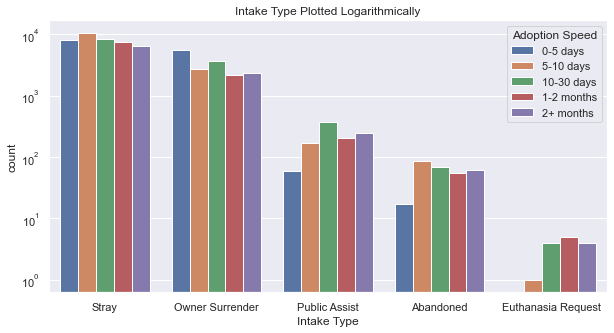

In [46]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(x='Intake Type', hue='Adoption Speed', data=df, hue_order=bucket_order)
ax.set_yscale('log')
ax.set_title('Intake Type Plotted Logarithmically')

Owner Surrenders are adopted a little faster, but this could be a coincidence. Strays are somewhat balanced across all categories, while public assists and euthanasia requests take a little longer. Especially for Euthanasia this makes a lot of sense, considering it takes a bit of time before an animal is either in good enough health or before someone can be found who's willing to take care of the sick or dying animal.

### How Are Ages Distributed? 
We have the information to calculate the exact ages upon intake and outcome but need to ask ourselves if this will be useful information. When entering an animal's details, do we want to enter its exact age? Age is often an estimated number in the case of strays and public assists, which makes up for a large portion of our data. 

We are able to evaluate both intake and outcome age. However, outcome age is unknown in a real-time scenario and generally rarely differs more than 2 months from the intake age. For this reason we'll look only into the intake age.

In [47]:
df['IntakeAge'] = pd.to_timedelta(df['IntakeAge'])
df['OutcomeAge'] = pd.to_timedelta(df['OutcomeAge'])

print(df['IntakeAge'].min())
print(df['IntakeAge'].max())
print(df['OutcomeAge'].min())
print(df['OutcomeAge'].max())

-299 days +12:47:00
6940 days 17:11:00
-295 days +17:13:00
6950 days 13:04:00


### Cleaning Up Age Values

We seem to have some impossible days. Some minimums are deep in the negative. Let's have a look and see where and how often this occurs before we plot our data.

In [48]:
delta = timedelta(days = 0)
df.loc[df['IntakeAge'] < delta][
    ['Animal ID', 'Animal Type', 'Breed', 'Gender', 'Color', 
     'IntakeAge', 'OutcomeAge', 'Date of Birth', 'Days in Shelter', 'Adoption Speed']]

,Animal ID,Animal Type,Breed,Gender,Color,IntakeAge,OutcomeAge,Date of Birth,Days in Shelter,Adoption Speed
313,A719808,Dog,Queensland Heeler Mix,Male,Buff,-12 days +11:56:00,60 days 16:41:00,2016-02-09,72 days 04:45:00,2+ months
613,A757589,Cat,Domestic Shorthair Mix,Female,Calico,-2 days +18:19:00,59 days 18:11:00,2017-09-04,60 days 23:52:00,2+ months
1191,A757588,Cat,Domestic Shorthair Mix,Male,Brown Tabby/White,-2 days +18:19:00,59 days 18:11:00,2017-09-04,60 days 23:52:00,2+ months
1669,A800201,Cat,Domestic Shorthair,Female,Calico,-15 days +17:53:00,82 days 12:05:00,2019-08-01,96 days 18:12:00,2+ months
1859,A680312,Dog,Australian Kelpie Mix,Male,Black/Tan,-3 days +10:00:00,70 days 17:17:00,2014-06-01,73 days 07:17:00,2+ months
...,...,...,...,...,...,...,...,...,...,...
123378,A680310,Dog,Australian Kelpie Mix,Male,Chocolate/White,-3 days +10:00:00,70 days 18:49:00,2014-06-01,73 days 08:49:00,2+ months
124016,A741275,Dog,Border Collie Mix,Male,Black/Brown,-45 days +12:16:00,66 days 08:41:00,2016-11-30,110 days 20:25:00,2+ months
124492,A836295,Cat,Domestic Shorthair,Female,Torbie,-3 days +13:36:00,67 days 18:18:00,2021-06-11,70 days 04:42:00,2+ months
126551,A791458,Cat,Domestic Shorthair Mix,Female,Black/White,-2 days +13:04:00,85 days 12:09:00,2019-03-25,86 days 23:05:00,2+ months


In [49]:
df.loc[df['OutcomeAge'] < delta][
    ['Animal ID', 'Animal Type', 'Breed', 'Gender', 'Color', 
     'IntakeAge', 'OutcomeAge', 'Date of Birth', 'Days in Shelter', 'Adoption Speed']]

,Animal ID,Animal Type,Breed,Gender,Color,IntakeAge,OutcomeAge,Date of Birth,Days in Shelter,Adoption Speed
27361,A751749,Dog,Border Collie Mix,Male,Black/White,-94 days +11:02:00,-93 days +17:29:00,2014-12-12,1 days 06:27:00,0-5 days
31810,A737397,Cat,Domestic Shorthair Mix,Female,White/Orange,-19 days +10:18:00,-10 days +18:16:00,2016-11-15,9 days 07:58:00,5-10 days
35090,A788866,Dog,German Shepherd/Catahoula,Male,Black Brindle,-299 days +12:47:00,-294 days +12:02:00,2019-12-06,4 days 23:15:00,0-5 days
40101,A745085,Dog,Australian Cattle Dog Mix,Female,White,-213 days +14:19:00,-212 days +18:11:00,2017-10-11,1 days 03:52:00,0-5 days
44222,A788874,Dog,Labrador Retriever Mix,Female,White/Tricolor,-299 days +13:50:00,-295 days +17:13:00,2019-12-06,4 days 03:23:00,0-5 days
104929,A702326,Cat,Domestic Shorthair Mix,Female,Black,-109 days +12:37:00,-97 days +17:01:00,2015-08-29,12 days 04:24:00,10-30 days


The incorrect data occurs for both cats and dogs. No specific character trait seems to influence this. Because the values are directly connected to our target variable they could skew with out results. My personal guess is that this is due to human error; people simply entered the values wrong. Luckily it only occurs in a tiny fraction of the data. Rather than trying to impute it we're going to drop the rows. In a later iteration we can try if imputing them gives a better result.

In [50]:
df.drop(df[df['IntakeAge'] < delta].index, inplace=True)
df.loc[(df['IntakeAge'] < delta) | (df['OutcomeAge'] < delta)]

,Animal ID,Animal Type,Breed,Breed Bucket,Gender,Color,Found Location,Date of Birth,Name,Intake DateTime,...,Black,White,Orange,Tortie,Calico,Blue,Tan,Brindle,Days in Shelter,Adoption Speed


### How Are Ages Distributed? (Part 2)
Now that we've cleaned up our ages, we can plot out the data. We'll plot both the Intake and Outcome ages. One time we'll group each by year, while the other time we'll group them by month. This will allow us to smoothen the curve in one graph, while gaining insight in a difference per month in the other.

We expect the intake and outcome graphs to be fairly similar because animals are rarely kept in the shelter for more than two months. 

<AxesSubplot:xlabel='OutcomeAge', ylabel='Animal ID'>

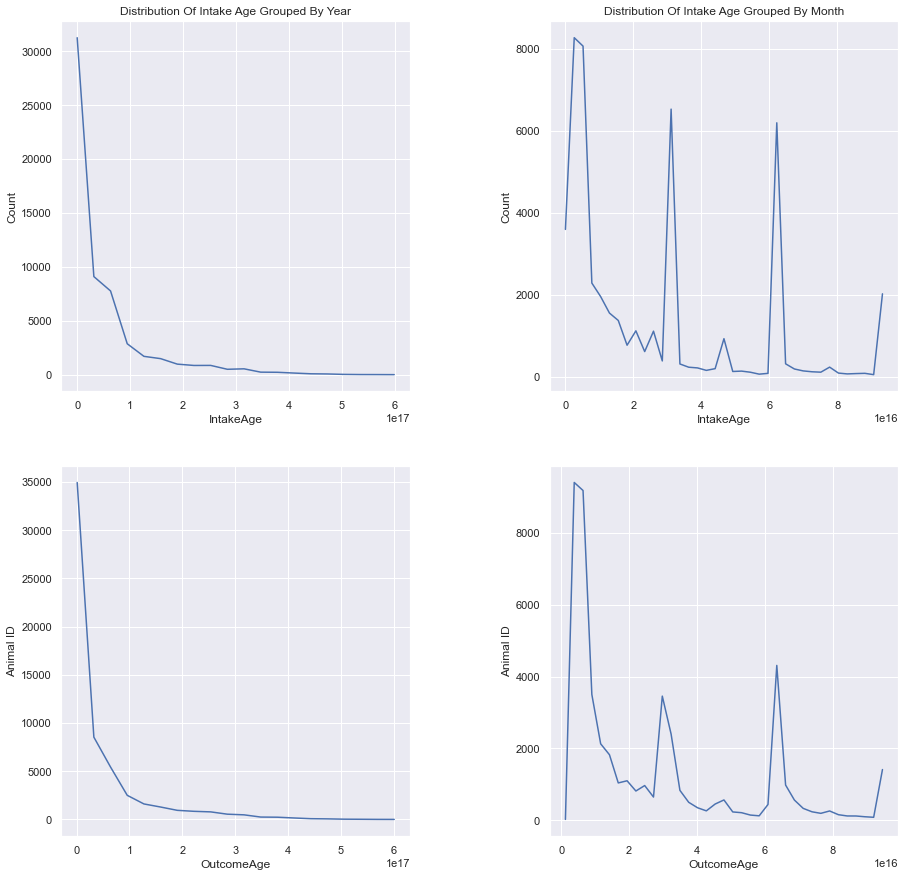

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
plt.subplots_adjust(wspace=0.4)

intake_age = df.set_index('IntakeAge').resample('365D').count().reset_index()
ax1 = sns.lineplot(data=intake_age, x='IntakeAge', y="Animal ID", ax=axes[0,0])
ax1.set_title("Distribution Of Intake Age Grouped By Year")
ax1.set_ylabel('Count')

delta = timedelta(days = 1100)
intake_age = df.set_index('IntakeAge').resample('30D').count().reset_index()
intake_age.drop(intake_age[intake_age['IntakeAge'] > delta].index, inplace=True)
ax2 = sns.lineplot(data=intake_age, x='IntakeAge', y="Animal ID", ax=axes[0,1])
ax2.set_title("Distribution Of Intake Age Grouped By Month")
ax2.set_ylabel('Count')

outcome_age = df.set_index('OutcomeAge').resample('365D').count().reset_index()
sns.lineplot(data=outcome_age, x='OutcomeAge', y="Animal ID", ax=axes[1,0])

delta = timedelta(days = 1100)
outcome_age = df.set_index('OutcomeAge').resample('30D').count().reset_index()
outcome_age.drop(outcome_age[outcome_age['OutcomeAge'] > delta].index, inplace=True)
sns.lineplot(data=outcome_age, x='OutcomeAge', y="Animal ID", ax=axes[1,1])

There's a lot more young animals than I previously anticipated. A large majority of animals is aged between 0 and 1. The spikes on the right side are very interesting. As I thought ages is often estimated. When it is estimated this is usually done on full years. The spikes occur at these estimated ages. It appears as is a lot of animals were both than month, while in reality it's more spread out. The left graphs are therefor a much better representation of reality.

### How Does Age Affect Adoption Speed?
People are more likely to adopt young animals. Kittens and puppies are considered very cute and usually don't stay in shelters for long. We can see if this is actually true by separating our graph into different adoption speeds.

<AxesSubplot:xlabel='Age In Years', ylabel='Count'>

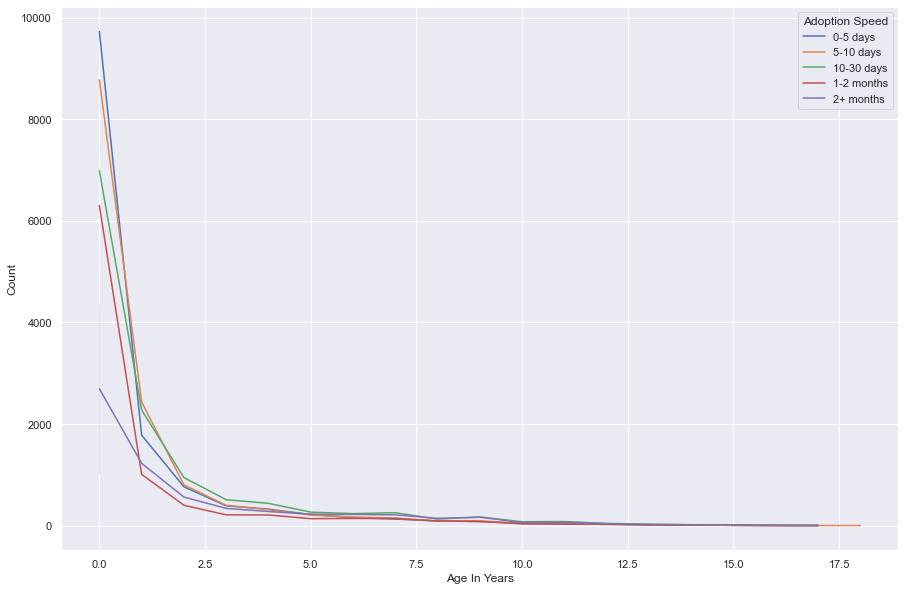

In [52]:
df_age = df[['IntakeAge', 'Adoption Speed']]
df_age = df_age.set_index('IntakeAge').groupby('Adoption Speed').resample('365D').count()
df_age = df_age.rename(columns={'Adoption Speed': 'Count'})
df_age = df_age.reset_index()
df_age['Age In Years'] = df_age['IntakeAge'].div(365.25)
df_age['Age In Years'] = df_age['Age In Years'].dt.days

fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(data=df_age, x='Age In Years', y="Count", hue='Adoption Speed', hue_order=bucket_order)

As expected young animals are likely to get adopted faster. This is mainly during the first year. We can still see some effect in the second and third year. Starting from year four and five the adoption speeds narrow down much closer and it becomes hard to tell a difference.

### When Are Animals Most Likely To Get Adopted?
There might be certain period that animals are more likely to be adopted. Shelters might also be busier at certain times of the year, which would skew with these results. To be more concise we'd have to compare the amount of adoptions to the occupation of the shelter. There might also be certain days that are favoured such as weekends.

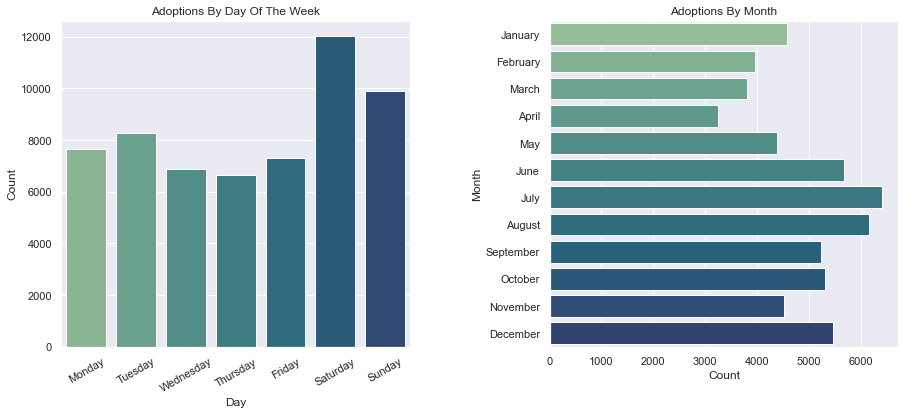

In [53]:
df = df.reset_index(drop=True)
df['Outcome DateTime'] = pd.to_datetime(df['Outcome DateTime'])

days = list(calendar.day_name)
day_series = df['Outcome DateTime'].dt.dayofweek.value_counts().sort_index()
df_days = pd.DataFrame({'Day': days, 'Count': day_series})

months = list(calendar.month_name[1:])
month_series = df['Outcome DateTime'].dt.month.value_counts().sort_index()
df_months = pd.DataFrame({'Month': months, 'Count': month_series})

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,6))
plt.subplots_adjust(wspace=0.4)
ax1 = sns.barplot(data=df_days, x='Day', y='Count', palette='crest', ax=axes[0])
ax2 = sns.barplot(data=df_months, x='Count', y='Month', palette='crest', ax=axes[1])
ax1.set_title('Adoptions By Day Of The Week')
ax2.set_title('Adoptions By Month')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
plt.show()

As expected people are much more likely to adopt on the weekends. This makes sense as people usually have more free time in order to visit the shelter. In the months we see a spike in December, which is to be expected. Our domain understanding told us this was because a lot of people end up getting a pet around Christmas. The spike at the start of the year also makes sense because this is when kitten season takes place. I'm not sure why July is as busy as it is seeing as it's the busiest month of the year.

### When Do Most Animals Get Taken In?
We expect this to be the early months due to kitten season. There could be a spike at July and December due to fireworks, but I expect most of those cases to be animals that are returned to their owners rather than adopted.

Text(0.5, 1.0, 'Intakes By Month')

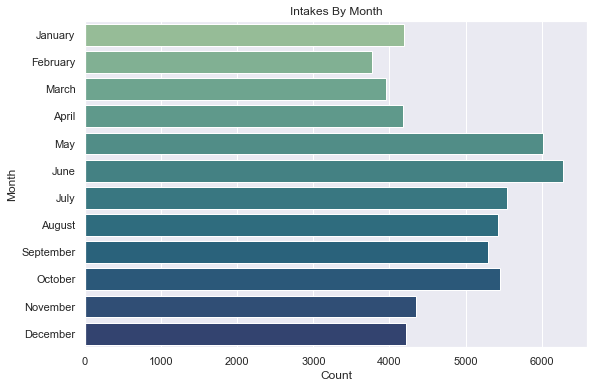

In [54]:
df['Intake DateTime'] = pd.to_datetime(df['Intake DateTime'])
month_series = df['Intake DateTime'].dt.month.value_counts().sort_index()
df_months = pd.DataFrame({'Month': months, 'Count': month_series})

ax = sns.barplot(data=df_months, x='Count', y='Month', palette='crest')
ax.set_title('Intakes By Month')

There's a spike in May and June, which explains why there's relatively many adoptions in June. October also appears to be a busy month, although I'm unable to explain as to why this is.

# 3. Saving the Dataframe <a class="anchor" id="chapter3"></a>
During the EDA we've made some small alterations to our datasheet. We'll therefor save the dataframe to a new file that can be used in the Modelling notebook. 

In [55]:
df.columns

Index(['Animal ID', 'Animal Type', 'Breed', 'Breed Bucket', 'Gender', 'Color',
       'Found Location', 'Date of Birth', 'Name', 'Intake DateTime',
       'Outcome DateTime', 'Sex upon Intake', 'Sex upon Outcome',
       'Age upon Intake', 'Age upon Outcome', 'IntakeAge', 'OutcomeAge',
       'Intake Type', 'Intake Condition', 'Outcome Subtype',
       'Castration Intake', 'Castration Outcome', 'Tabby', 'Tricolor', 'Brown',
       'Black', 'White', 'Orange', 'Tortie', 'Calico', 'Blue', 'Tan',
       'Brindle', 'Days in Shelter', 'Adoption Speed'],
      dtype='object')

In [56]:
df.to_csv('Datasets/Austin Data Prep.csv', index=False)